In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.feature import hog

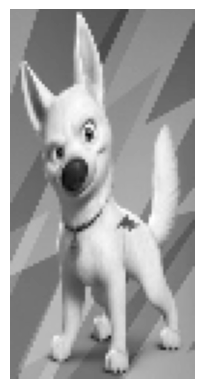

In [8]:
image = cv2.imread('image.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (64, 128))
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

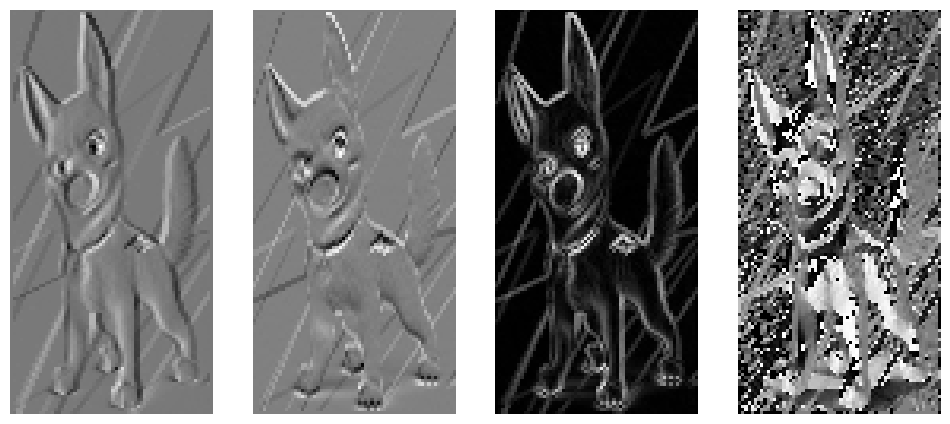

In [9]:
gx = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize=1)

mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

plt.figure(figsize=(12, 8))
plt.subplot(1, 4, 1)

plt.imshow(gx, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(gy, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(mag, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(angle, cmap="gray")
plt.axis("off")
plt.show()

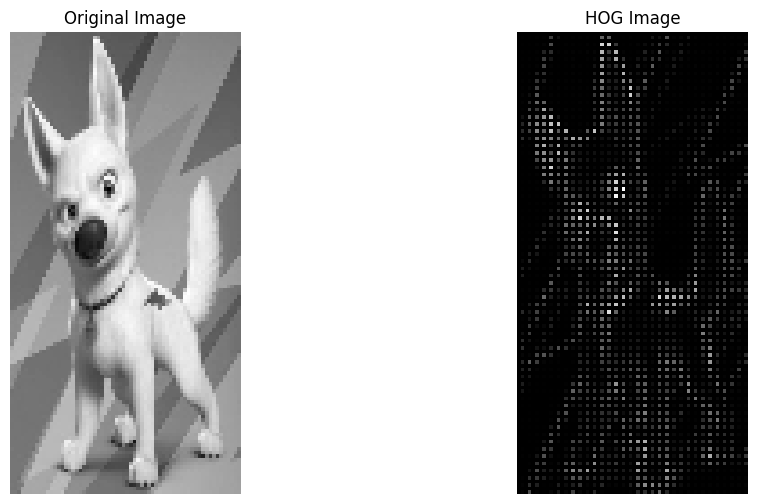

In [17]:
fd, hog_image = hog(
    image,
    orientations=9,
    pixels_per_cell=(2, 2),
    cells_per_block=(2, 2),
    visualize=True,
    feature_vector=True
)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Image')
plt.axis('off')
plt.show()

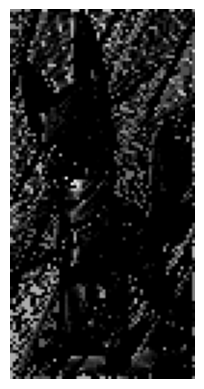

In [ ]:
new_image = image + mag + angle
new_image = np.clip(new_image, 0, 255).astype(np.uint8)
new_image = 255 - new_image
plt.imshow(new_image, cmap="gray")
plt.axis("off")
plt.show()
